In [6]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [2]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

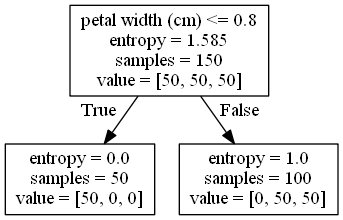

In [3]:
draw_decision_tree(tree1)

In [8]:
y1 = data.target
X1 = data.data[:, :2]
feature_names = data.feature_names[:2]
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X1, y1)

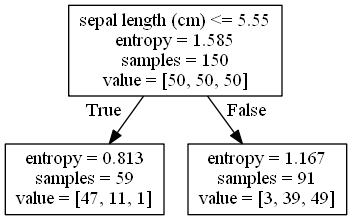

In [10]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
draw_decision_tree(tree1)

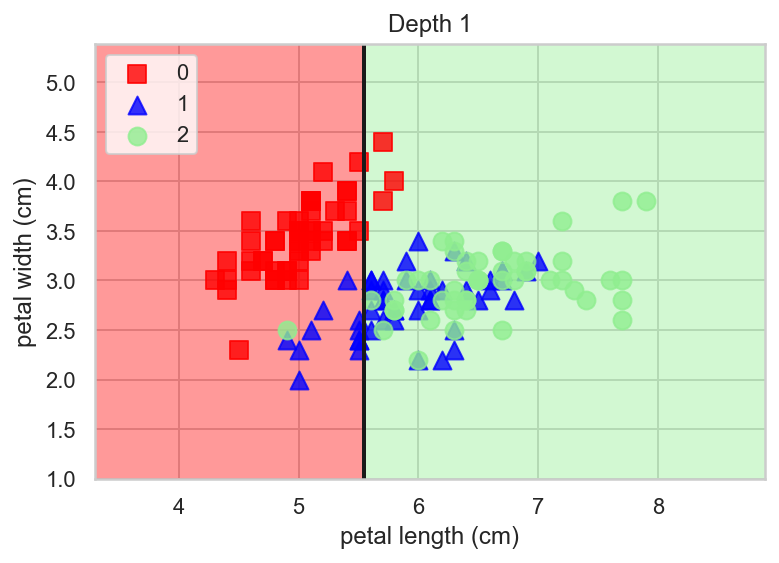

In [9]:
plot_decision_regions(X1, y1, tree1, "Depth 1")
plt.show()

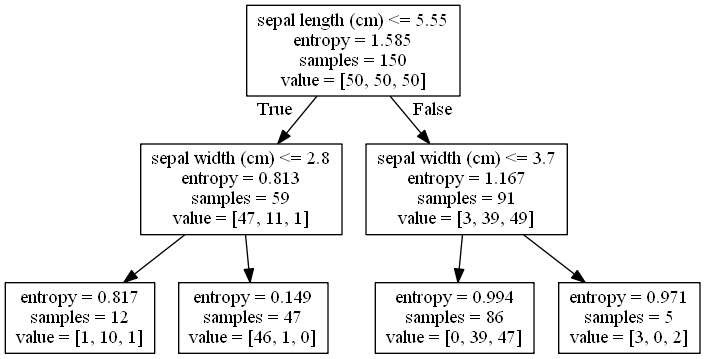

In [15]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X1, y1)
draw_decision_tree(tree2)

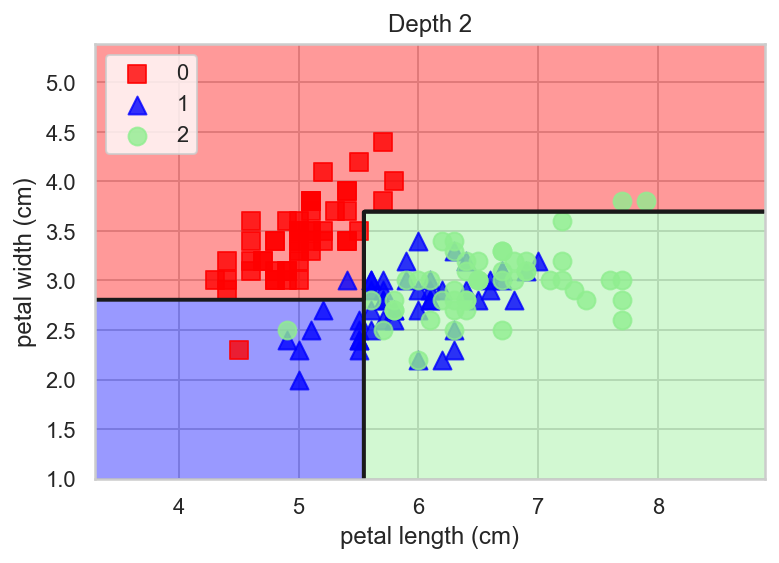

In [16]:
plot_decision_regions(X1, y1, tree2, "Depth 2")
plt.show()

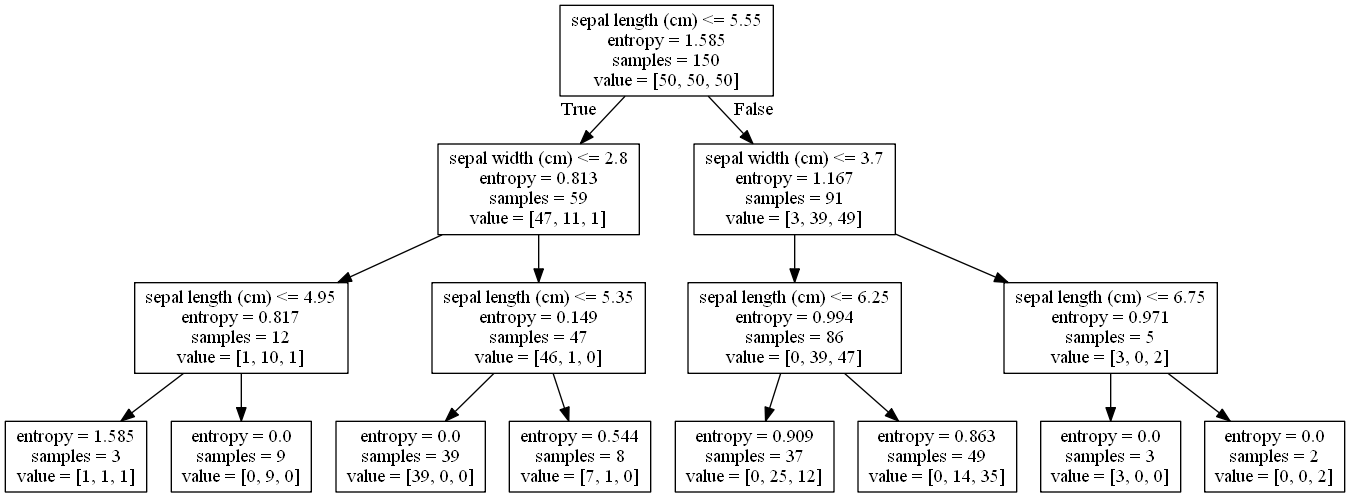

In [17]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X1, y1)
draw_decision_tree(tree3)

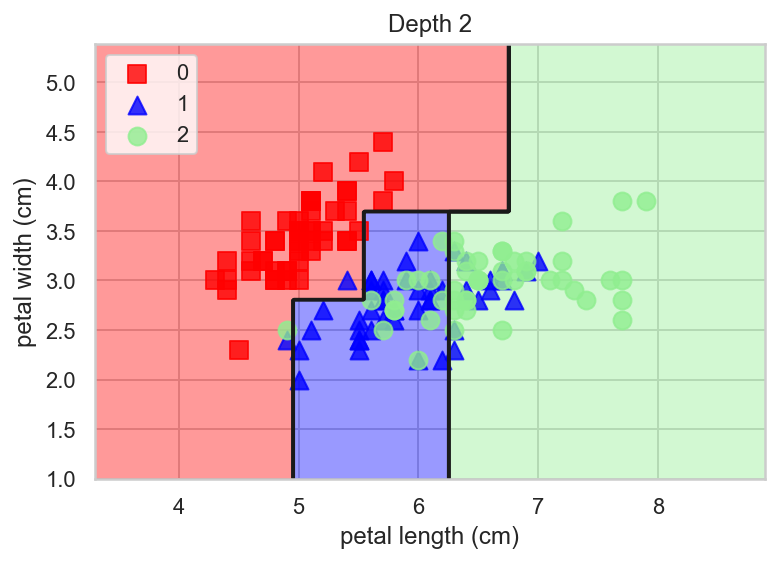

In [18]:
plot_decision_regions(X1, y1, tree3, "Depth 2")
plt.show()

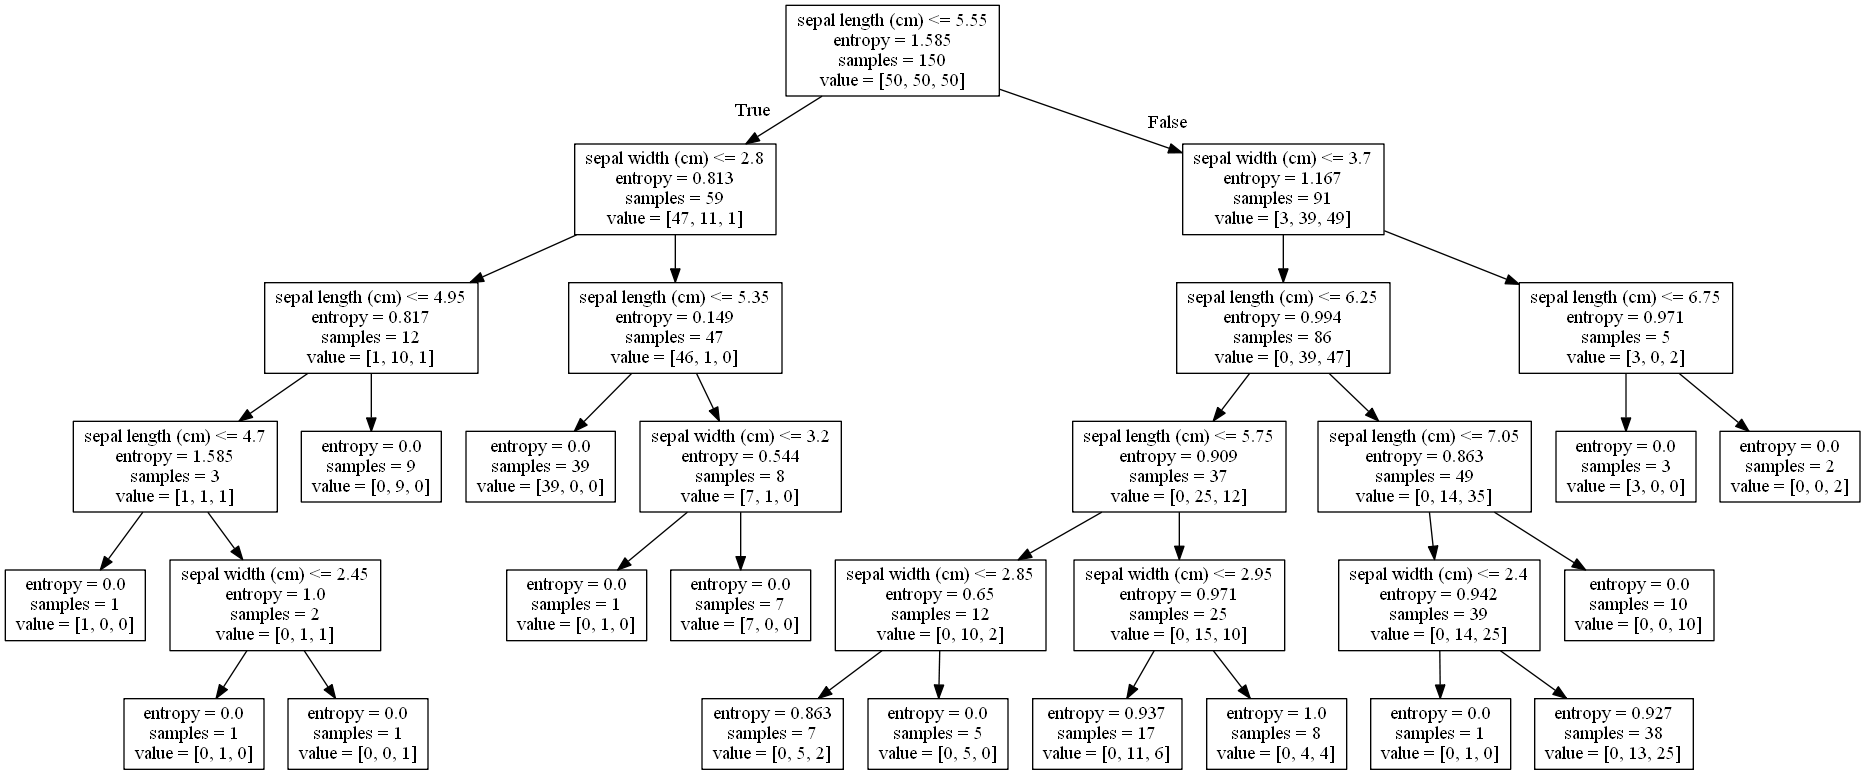

In [27]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X1, y1)
draw_decision_tree(tree5)

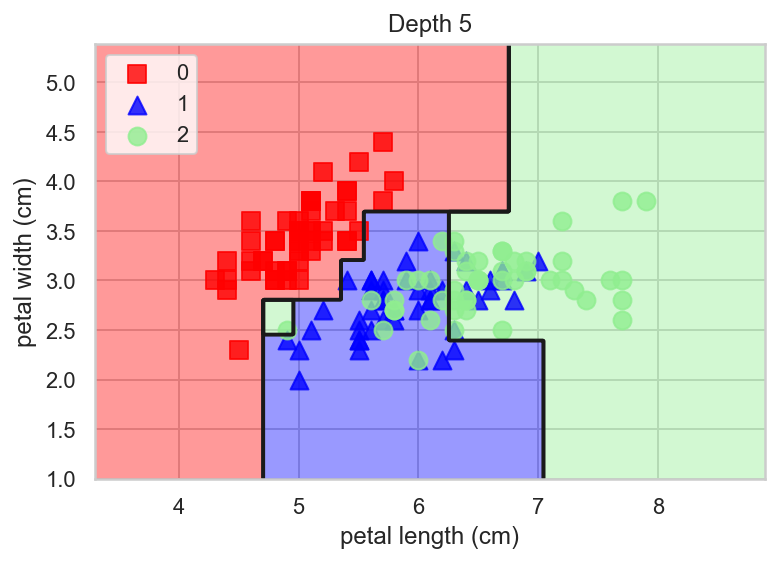

In [28]:
plot_decision_regions(X1, y1, tree5, "Depth 5")
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y1, tree5.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.76      0.74      0.75        50
           2       0.75      0.76      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

max_depth : 5, max_accuracy : 0.6866666666666668


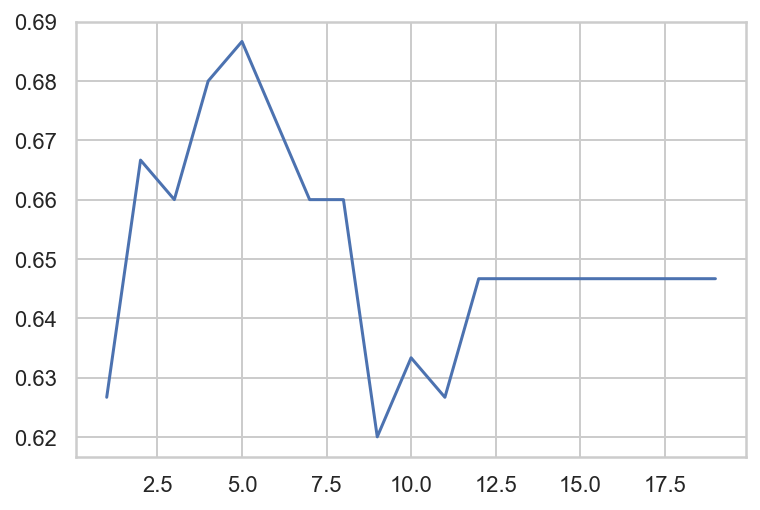

In [49]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
max_depth = 0
max_result = 0
yy = []
for i in range(1,20):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i, 
                               random_state=0)
    result = cross_val_score(model, X1, y1, scoring="accuracy", cv=cv).mean()
    yy.append(result)
    if max_result < result:
        max_result = result
        max_depth = i
print("max_depth : {}, max_accuracy : {}".format(max_depth, max_result))
plt.plot(range(1,20),yy)
plt.show()